In [64]:
import warnings
warnings.filterwarnings("ignore", message="The frame.append method is deprecated")
warnings.filterwarnings("ignore", category=FutureWarning)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
sp6m_mpd = pd.read_csv('/content/drive/My Drive/IAQF_Data/eq_and_fx.csv')
sp6m_mpd.head()

,market,idt,maturity_target,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc
0,sp6m,01/12/2007,6.0,0.018803,0.086435,-1.079705,1.837194,-0.095498,0.03382,0.111149,-20.0,0.024242,20.0,0.001915
1,sp6m,01/31/2007,6.0,0.018350,0.077969,-1.046439,1.842209,-0.083769,0.03099,0.102377,-20.0,0.016758,20.0,0.000767
2,sp6m,02/15/2007,6.0,0.019976,0.084543,-1.001081,1.588657,-0.092096,0.03361,0.111834,-20.0,0.021096,20.0,0.001900
3,sp6m,02/28/2007,6.0,0.018823,0.100147,-1.031801,1.638698,-0.114332,0.03565,0.126683,-20.0,0.036788,20.0,0.007350
4,sp6m,03/15/2007,6.0,0.018767,0.099519,-1.058040,1.823271,-0.112902,0.03536,0.125505,-20.0,0.036138,20.0,0.007715


In [68]:
sp_vix_data = pd.read_csv('/content/drive/My Drive/IAQF_Data/^VIX.csv')
sp_vix_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,12.16,12.75,11.53,12.04,12.04,0.0
1,2007-01-04,12.40,12.42,11.28,11.51,11.51,0.0
2,2007-01-05,11.84,12.25,11.68,12.14,12.14,0.0
3,2007-01-08,12.48,12.83,11.78,12.00,12.00,0.0
4,2007-01-09,11.86,12.47,11.69,11.91,11.91,0.0


In [69]:
ftse100_data = pd.read_csv('/content/drive/My Drive/IAQF_Data/ftse100.csv')
ftse100_data.head()

,idt,mu,sd,skew,kurt
0,01-Apr-92,2447.62,238.46,-0.26,3.05
1,02-Apr-92,2431.08,228.49,-0.21,3.07
2,03-Apr-92,NaN,NaN,NaN,NaN
3,06-Apr-92,2432.91,225.41,-0.21,3.15
4,07-Apr-92,2433.45,225.80,-0.20,3.15


In [70]:
ftse100_vix_data = pd.read_csv('/content/drive/My Drive/IAQF_Data/ftse_100_vix.csv')
ftse100_vix_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06/27/2019,10.96,10.89,11.54,10.27,NaN,-0.18%
1,06/26/2019,10.98,11.38,11.65,10.86,NaN,-3.94%
2,06/25/2019,11.43,11.26,11.61,10.92,NaN,1.33%
3,06/24/2019,11.28,10.70,11.43,10.39,NaN,5.92%
4,06/21/2019,10.65,10.16,10.92,9.73,NaN,3.60%


In [71]:
spx_returns = pd.read_csv('/content/drive/My Drive/IAQF_Data/^GSPC.csv')
spx_returns.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-12,1423.819946,1431.229980,1422.579956,1430.729980,1430.729980,2686480000
1,2007-01-16,1430.729980,1433.930054,1428.619995,1431.900024,1431.900024,2599530000
2,2007-01-17,1431.770020,1435.270020,1428.569946,1430.619995,1430.619995,2690270000
3,2007-01-18,1430.589966,1432.959961,1424.209961,1426.369995,1426.369995,2822430000
4,2007-01-19,1426.349976,1431.569946,1425.189941,1430.500000,1430.500000,2777480000


In [72]:
spx_returns['Date'] = pd.to_datetime(spx_returns['Date'])
spx_returns.set_index('Date', inplace=True)

In [73]:
spx_returns['daily_return'] = spx_returns['Adj Close'].pct_change() * 100

spx_returns['30_day_forward_avg_return'] = 0.0
for i in range(1, 31):
    spx_returns['30_day_forward_avg_return'] += spx_returns['daily_return'].shift(-i)
spx_returns['30_day_forward_avg_return'] /= 30

spx_returns['30_day_forward_volatility'] = 0.0
for i in range(1, 31):
    spx_returns['30_day_forward_volatility'] += (spx_returns['Adj Close'].shift(-i) - spx_returns['Adj Close'])**2
spx_returns['30_day_forward_volatility'] = (spx_returns['30_day_forward_volatility'] / 30).apply(lambda x: x if x > 0 else 0).apply(lambda x: x**0.5)
spx_returns['30_day_forward_volatility'] = spx_returns['30_day_forward_volatility'] / spx_returns['Adj Close'] * 100

spx_returns.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility
Date,,,,,,,,,
2007-01-12,1423.819946,1431.229980,1422.579956,1430.729980,1430.729980,2686480000,NaN,-0.071641,1.168093
2007-01-16,1430.729980,1433.930054,1428.619995,1431.900024,1431.900024,2599530000,0.081780,-0.055831,1.170353
2007-01-17,1431.770020,1435.270020,1428.569946,1430.619995,1430.619995,2690270000,-0.089394,-0.061499,1.260543
2007-01-18,1430.589966,1432.959961,1424.209961,1426.369995,1426.369995,2822430000,-0.297074,-0.089606,1.497233
2007-01-19,1426.349976,1431.569946,1425.189941,1430.500000,1430.500000,2777480000,0.289547,-0.130616,1.555199


In [74]:
spx_returns_cleaned = spx_returns.dropna()
spx_returns_cleaned.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility
Date,,,,,,,,,
2007-01-16,1430.729980,1433.930054,1428.619995,1431.900024,1431.900024,2599530000,0.081780,-0.055831,1.170353
2007-01-17,1431.770020,1435.270020,1428.569946,1430.619995,1430.619995,2690270000,-0.089394,-0.061499,1.260543
2007-01-18,1430.589966,1432.959961,1424.209961,1426.369995,1426.369995,2822430000,-0.297074,-0.089606,1.497233
2007-01-19,1426.349976,1431.569946,1425.189941,1430.500000,1430.500000,2777480000,0.289547,-0.130616,1.555199
2007-01-22,1430.469971,1431.390015,1420.400024,1422.949951,1422.949951,2540120000,-0.527791,-0.061378,1.778334


In [75]:
import matplotlib.pyplot as plt

sp_vix_data['Date'] = pd.to_datetime(sp_vix_data['Date'])
sp_vix_data.set_index('Date', inplace=True)

merged_data = spx_returns_cleaned.join(sp_vix_data['Adj Close'], how='inner', rsuffix='_VIX')

In [76]:
merged_data['VIX_vs_SPX_vol_diff'] =  merged_data['30_day_forward_volatility'] - merged_data['Adj Close_VIX']

merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility,Adj Close_VIX,VIX_vs_SPX_vol_diff
Date,,,,,,,,,,,
2007-01-16,1430.729980,1433.930054,1428.619995,1431.900024,1431.900024,2599530000,0.081780,-0.055831,1.170353,10.74,-9.569647
2007-01-17,1431.770020,1435.270020,1428.569946,1430.619995,1430.619995,2690270000,-0.089394,-0.061499,1.260543,10.59,-9.329457
2007-01-18,1430.589966,1432.959961,1424.209961,1426.369995,1426.369995,2822430000,-0.297074,-0.089606,1.497233,10.85,-9.352767
2007-01-19,1426.349976,1431.569946,1425.189941,1430.500000,1430.500000,2777480000,0.289547,-0.130616,1.555199,10.40,-8.844801
2007-01-22,1430.469971,1431.390015,1420.400024,1422.949951,1422.949951,2540120000,-0.527791,-0.061378,1.778334,10.77,-8.991666


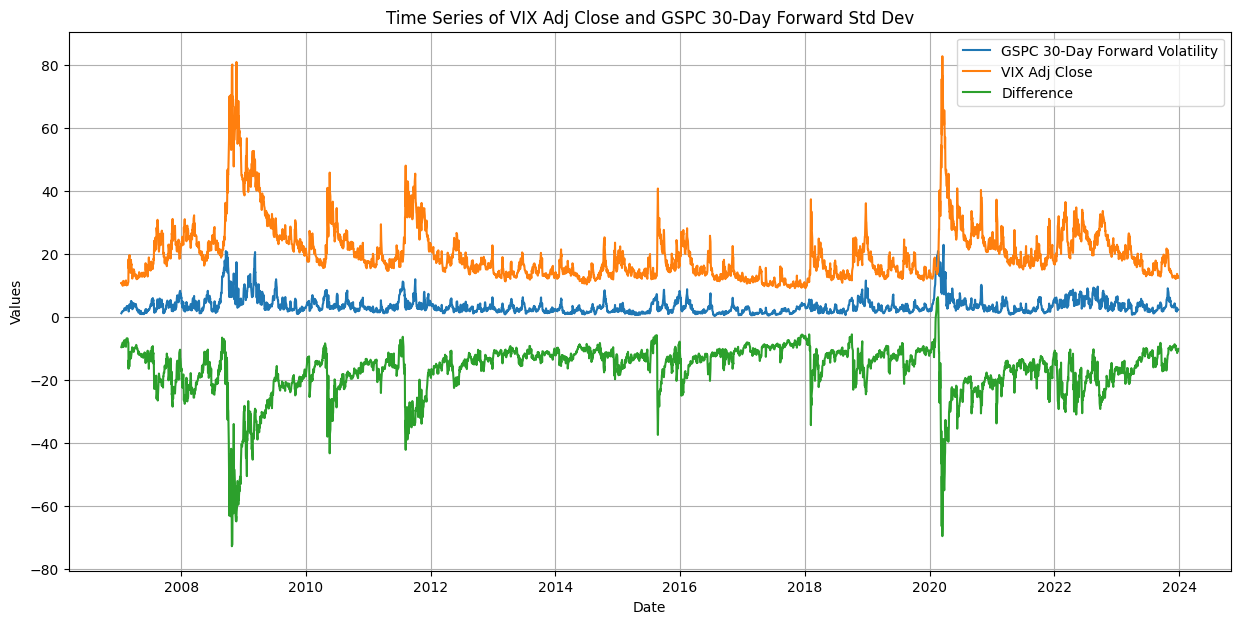

In [77]:
plt.figure(figsize=(15, 7))

plt.plot(merged_data.index, merged_data['30_day_forward_volatility'], label='GSPC 30-Day Forward Volatility')
plt.plot(merged_data.index, (merged_data['Adj Close_VIX']), label='VIX Adj Close')
plt.plot(merged_data.index, merged_data['VIX_vs_SPX_vol_diff'], label='Difference')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of VIX Adj Close and GSPC 30-Day Forward Std Dev')
plt.legend()
plt.grid(True)

plt.show()

<Figure size 1200x600 with 0 Axes>

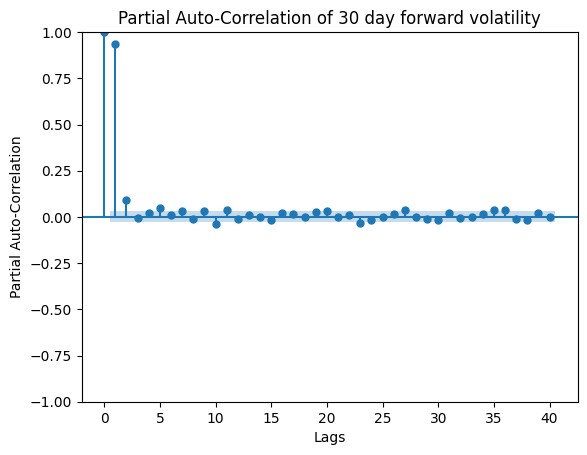

In [78]:
from statsmodels.graphics.tsaplots import plot_pacf

forward_vol = merged_data['30_day_forward_volatility']

plt.figure(figsize=(12, 6))
plot_pacf(forward_vol, lags=40, method='ywm')
plt.title('Partial Auto-Correlation of 30 day forward volatility')
plt.xlabel('Lags')
plt.ylabel('Partial Auto-Correlation')
plt.show()

In [79]:
!pip install arch

In [80]:
from arch import arch_model

volatility_data = spx_returns['30_day_forward_volatility'].dropna()
train_size = int(len(volatility_data) * 0.7)
train_data = volatility_data[:train_size]

garch_model = arch_model(train_data, vol='Garch', p=1, q=1)

garch_fit = garch_model.fit(disp='off')

garch_summary = garch_fit.summary()
garch_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GARCH Model Results                         
=====================================================================================
Dep. Variable:     30_day_forward_volatility   R-squared:                       0.000
Mean Model:                    Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GARCH   Log-Likelihood:               -4867.47
Distribution:                         Normal   AIC:                           9742.95
Method:                   Maximum Likelihood   BIC:                           9766.98
                                               No. Observations:                 3009
Date:                       Thu, Feb 29 2024   Df Residuals:                     3008
Time:                               15:52:42   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.1087  7.431e-02     28.377 3.936e-177 [  1.963,  2.254]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2062  3.563e-02      5.788  7.108e-09   [  0.136,  0.276]
alpha[1]       0.9183  6.500e-02     14.126  2.619e-45   [  0.791,  1.046]
beta[1]        0.0817  3.461e-02      2.362  1.819e-02 [1.390e-02,  0.150]
==========================================================================

Covariance estimator: robust
"""

In [81]:
test_data = volatility_data[train_size:]

rolling_predictions = []
test_size = len(test_data)

for new_val in range(test_size):
    train = volatility_data[:-(test_size-new_val)]
    model_updated = arch_model(train, vol='Garch', p=1, q=1)
    model_updated_fit = model_updated.fit(disp='off')
    pred = model_updated_fit.forecast(horizon=1)

    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

predicted_series = pd.Series(rolling_predictions, index=volatility_data.index[-test_size:])

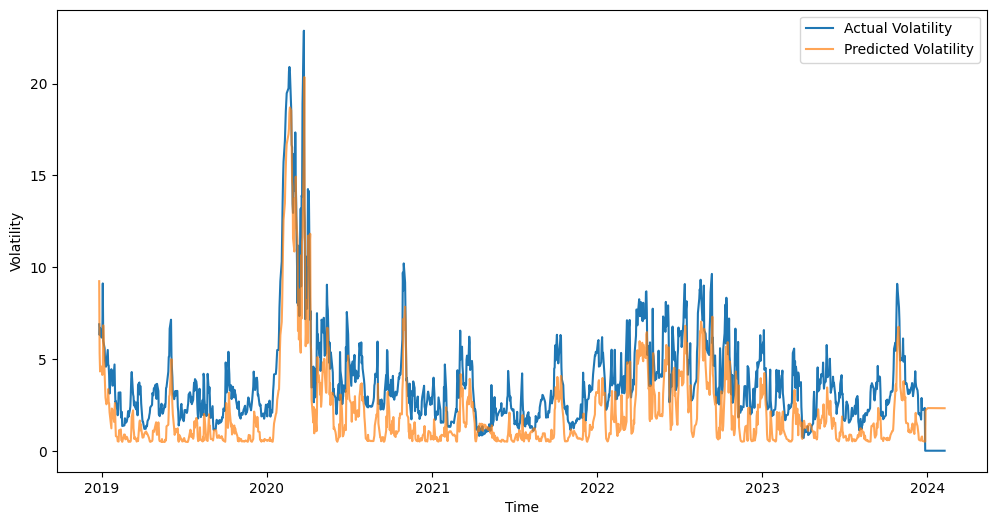

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual Volatility')
plt.plot(predicted_series, label='Predicted Volatility', alpha=0.7)
#plt.title('Actual vs Predicted Volatility - Rolling Forecast')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_data, predicted_series.values)
mae = mean_absolute_error(test_data, predicted_series.values)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 4.437815561997699
Mean Absolute Error: 1.8531489904912302


In [84]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

actual = np.array(test_data)
predicted = np.array(predicted_series)

mse = mean_squared_error(actual, predicted)

rmse = np.sqrt(mse)

mae = mean_absolute_error(actual, predicted)

r_squared = r2_score(actual, predicted)

mse, rmse, mae, r_squared

(4.437815561997699,
 2.1066123426007213,
 1.8531489904912302,
 0.42432739581984413)

In [85]:
import numpy as np
import pandas as pd
from arch import arch_model

test_data = volatility_data[train_size:]

rolling_predictions = []
rolling_lower = []
rolling_upper = []

test_size = len(test_data)

for new_val in range(test_size):
    train = volatility_data[:-(test_size-new_val)]
    model_updated = arch_model(train, vol='Garch', p=1, q=1)
    model_updated_fit = model_updated.fit(disp='off')
    pred = model_updated_fit.forecast(horizon=1)

    forecast_mean = pred.mean.values[-1, 0]
    forecast_variance = pred.variance.values[-1, 0]

    lower_bound = forecast_mean - 1.96 * np.sqrt(forecast_variance)
    upper_bound = forecast_mean + 1.96 * np.sqrt(forecast_variance)

    rolling_predictions.append(forecast_mean)
    rolling_lower.append(lower_bound)
    rolling_upper.append(upper_bound)

predicted_series = pd.Series(rolling_predictions, index=volatility_data.index[-test_size:])
lower_series = pd.Series(rolling_lower, index=volatility_data.index[-test_size:])
upper_series = pd.Series(rolling_upper, index=volatility_data.index[-test_size:])

within_interval = ((test_data >= lower_series) & (test_data <= upper_series)).sum()
total_points = len(test_data)

proportion_within_interval = within_interval / total_points

is_significant = proportion_within_interval >= 0.95

In [86]:
proportion_within_interval, is_significant

(0.9658914728682171, True)

In [ ]:
full_data = volatility_data[1:]

rolling_predictions2 = []
test_size = len(full_data)

for new_val in range(test_size):
    train = volatility_data[:-(test_size-new_val)]
    model_updated = arch_model(train, vol='Garch', p=1, q=2)
    model_updated_fit = model_updated.fit(disp='off')
    pred = model_updated_fit.forecast(horizon=1)
    rolling_predictions2.append(np.sqrt(pred.variance.values[-1,:][0]))

predicted_series2 = pd.Series(rolling_predictions2, index=volatility_data.index[-test_size:])

/usr/local/lib/python3.10/dist-packages/arch/univariate/volatility.py:1197: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.mean(resids**2) / (target ** (2.0 / power))
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: invalid value encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: divide by zero encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:451: RuntimeWarning: invalid value encountered in add
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.1

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(full_data, label='Actual Volatility', alpha=0.7)
plt.plot(predicted_series2, label='Predicted Volatility', alpha=0.7)
plt.title('Actual vs Predicted Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(full_data, predicted_series2.values)
mae = mean_absolute_error(full_data, predicted_series2.values)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

In [ ]:
merged_data['Predicted Volatility'] = predicted_series2
merged_data.head()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['30_day_forward_volatility'], label='Actual Volatility')
plt.plot(merged_data['Predicted Volatility'], label='Predicted Volatility', alpha=0.7)
plt.title('Actual vs Predicted Volatility - Rolling Forecast')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [ ]:
merged_data['Volatility_Diff'] = (merged_data['Predicted Volatility'] ** 2) - (merged_data['Adj Close_VIX'] ** 2)

In [93]:
vix_futures = pd.read_csv('/content/drive/My Drive/IAQF_Data/vix_futures.csv')
vix_futures.head()

,Dates,UX1 Index,UX2 Index,UX3 Index,UX4 Index
0,31/12/20,23.675,25.575,25.775,25.950
1,01/01/21,23.675,25.575,25.775,25.950
2,04/01/21,26.275,27.125,26.875,26.825
3,05/01/21,25.325,26.425,26.425,26.425
4,06/01/21,25.125,26.275,26.275,26.225


In [94]:
sp6m_mpd.rename(columns={'idt': 'Date'}, inplace=True)
sp6m_mpd = sp6m_mpd[['Date', 'skew', 'p10', 'p90', 'prDec', 'prInc']]
sp6m_mpd['Date'] = pd.to_datetime(sp6m_mpd['Date'])
sp6m_mpd.set_index('Date', inplace=True)

<ipython-input-94-709e61c85767>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp6m_mpd['Date'] = pd.to_datetime(sp6m_mpd['Date'])


In [95]:
sp6m_mpd = sp6m_mpd.reindex(merged_data.index)
sp6m_mpd.head(20)

,skew,p10,p90,prDec,prInc
Date,,,,,
2007-01-16,NaN,NaN,NaN,NaN,NaN
2007-01-17,NaN,NaN,NaN,NaN,NaN
2007-01-18,NaN,NaN,NaN,NaN,NaN
2007-01-19,NaN,NaN,NaN,NaN,NaN
2007-01-22,NaN,NaN,NaN,NaN,NaN
2007-01-23,NaN,NaN,NaN,NaN,NaN
2007-01-24,NaN,NaN,NaN,NaN,NaN
2007-01-25,NaN,NaN,NaN,NaN,NaN
2007-01-26,NaN,NaN,NaN,NaN,NaN


In [96]:
columns_to_interpolate = ['skew', 'p10', 'p90', 'prDec', 'prInc']
for col in columns_to_interpolate:
    for date in sp6m_mpd.index:
        if pd.isna(sp6m_mpd.loc[date, col]):

            prev_date = sp6m_mpd[col].loc[:date].last_valid_index()
            next_date = sp6m_mpd[col].loc[date:].first_valid_index()
            if pd.notna(prev_date) and pd.notna(next_date) and prev_date != next_date:
                prev_val = sp6m_mpd.loc[prev_date, col]
                next_val = sp6m_mpd.loc[next_date, col]
                diff = next_val - prev_val
                days_diff = (next_date - prev_date).days
                increment = diff / days_diff

                num_days = (date - prev_date).days
                sp6m_mpd.loc[date, col] = prev_val + num_days * increment

sp6m_mpd = sp6m_mpd.dropna()
sp6m_mpd.head()

,skew,p10,p90,prDec,prInc
Date,,,,,
2007-01-31,-1.046439,-0.083769,0.102377,0.016758,0.000767
2007-02-01,-1.043415,-0.084324,0.103007,0.017047,0.000842
2007-02-02,-1.040392,-0.084880,0.103638,0.017336,0.000918
2007-02-05,-1.031320,-0.086545,0.105529,0.018204,0.001144
2007-02-06,-1.028296,-0.087100,0.106160,0.018493,0.001220


In [97]:
merged_data_final = pd.merge(merged_data, sp6m_mpd, left_index=True, right_index=True, how='left')

merged_data_final = merged_data_final.dropna()
(merged_data_final.head())

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility,Adj Close_VIX,VIX_vs_SPX_vol_diff,Predicted Volatility,Volatility_Diff,skew,p10,p90,prDec,prInc
Date,,,,,,,,,,,,,,,,,,
2007-01-31,1428.650024,1441.609985,1424.780029,1438.239990,1438.239990,2976690000,0.659288,-0.104071,2.176811,10.42,-8.243189,0.215239,-108.530072,-1.046439,-0.083769,0.102377,0.016758,0.000767
2007-02-01,1437.900024,1446.640015,1437.900024,1445.939941,1445.939941,2914890000,0.535373,-0.134678,2.539403,10.31,-7.770597,0.420751,-106.119068,-1.043415,-0.084324,0.103007,0.017047,0.000842
2007-02-02,1445.939941,1449.329956,1444.489990,1448.390015,1448.390015,2569450000,0.169445,-0.104011,2.704556,10.08,-7.375444,0.781182,-100.996155,-1.040392,-0.084880,0.103638,0.017336,0.000918
2007-02-05,1448.329956,1449.380005,1443.849976,1446.989990,1446.989990,2439430000,-0.096661,-0.079677,2.682342,10.55,-7.867658,0.943931,-110.411495,-1.031320,-0.086545,0.105529,0.018204,0.001144
2007-02-06,1446.979980,1450.189941,1443.400024,1448.000000,1448.000000,2608710000,0.069801,-0.025068,2.732542,10.65,-7.917458,0.919690,-112.576670,-1.028296,-0.087100,0.106160,0.018493,0.001220


In [98]:
def calculate_cumulative_return(data, days=30):
    cum_return = []
    for i in range(len(data)):
        if i + days < len(data):
            cum_return.append(data.iloc[i + days] / data.iloc[i] - 1)
        else:
            cum_return.append(data.iloc[-1] / data.iloc[i] - 1)
    return pd.Series(cum_return, index=data.index)

merged_data_final['Next_30_days_cum_return'] = calculate_cumulative_return(merged_data_final['Adj Close'], 30) * 100
merged_data_final['VIX_Settlement'] = merged_data_final['Adj Close_VIX'].shift(-30)

(merged_data_final.head())

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility,Adj Close_VIX,VIX_vs_SPX_vol_diff,Predicted Volatility,Volatility_Diff,skew,p10,p90,prDec,prInc,Next_30_days_cum_return,VIX_Settlement
Date,,,,,,,,,,,,,,,,,,,,
2007-01-31,1428.650024,1441.609985,1424.780029,1438.239990,1438.239990,2976690000,0.659288,-0.104071,2.176811,10.42,-8.243189,0.215239,-108.530072,-1.046439,-0.083769,0.102377,0.016758,0.000767,-3.195570,16.430000
2007-02-01,1437.900024,1446.640015,1437.900024,1445.939941,1445.939941,2914890000,0.535373,-0.134678,2.539403,10.31,-7.770597,0.420751,-106.119068,-1.043415,-0.084324,0.103007,0.017047,0.000842,-4.079698,16.790001
2007-02-02,1445.939941,1449.329956,1444.489990,1448.390015,1448.390015,2569450000,0.169445,-0.104011,2.704556,10.08,-7.375444,0.781182,-100.996155,-1.040392,-0.084880,0.103638,0.017336,0.000918,-3.198721,14.590000
2007-02-05,1448.329956,1449.380005,1443.849976,1446.989990,1446.989990,2439430000,-0.096661,-0.079677,2.682342,10.55,-7.867658,0.943931,-110.411495,-1.031320,-0.086545,0.105529,0.018204,0.001144,-2.491382,13.270000
2007-02-06,1446.979980,1450.189941,1443.400024,1448.000000,1448.000000,2608710000,0.069801,-0.025068,2.732542,10.65,-7.917458,0.919690,-112.576670,-1.028296,-0.087100,0.106160,0.018493,0.001220,-0.895025,12.190000


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

merged_data_final = merged_data_final.dropna()

#X = merged_data_final[['Volatility_Diff', 'skew', 'p10', 'p90']]
X = merged_data_final[['Predicted Volatility', 'skew', 'p10', 'p90', 'prInc']]
y = merged_data_final['VIX_Settlement']
X = X.dropna()
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

coefficients = linear_model.coef_

print("Mean Squared Error:", mse)
print("Regression Coefficients:", coefficients)

Mean Squared Error: 36.03472183744985
Regression Coefficients: [  1.79838266   0.89229242 -20.19194733 115.07569735 -47.86207459]


In [102]:
X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VIX_Settlement   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     1216.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:53:02   Log-Likelihood:                -13462.
No. Observations:                4227   AIC:                         2.694e+04
Df Residuals:                    4221   BIC:                         2.697e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.6239 

In [103]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

features = merged_data_final[['Predicted Volatility', 'skew', 'p10', 'p90', 'prDec', 'prInc']]
target = merged_data_final['VIX_Settlement']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
X = np.reshape(scaled_features, (scaled_features.shape[0], 1, scaled_features.shape[1]))
y = target.values

dates = merged_data_final.index

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, dates, test_size=0.3, random_state=42
)

model = Sequential()
model.add(LSTM(units=30, return_sequences=True, input_shape=(X.shape[1], X.shape[2]),
               kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.3))
model.add(LSTM(units=30, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.3))
model.add(Dense(units=1))

optimizer = Adam(lr=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0,
          validation_split=0.1, callbacks=[early_stopping])
predicted_volatility = model.predict(X_test)

mse = mean_squared_error(y_test, predicted_volatility)
print('Test MSE: ', mse)

predicted_volatility_series = pd.Series(
    predicted_volatility.flatten(), index=dates_test
)


40/40 [==============================] - 1s 1ms/step
Test MSE:  37.948814669388426


In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 30)             4440      
                                                                 
 dropout_2 (Dropout)         (None, 1, 30)             0         
                                                                 
 lstm_3 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11791 (46.06 KB)
Trainable params: 11791 (46.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
from scipy import stats

predicted_volatility_flat = predicted_volatility.flatten()

t_stat, p_value = stats.ttest_ind(y_test, predicted_volatility_flat)

print("T-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The difference in mean volatility between the actual and predicted is significant.")
else:
    print("The difference in mean volatility between the actual and predicted is not significant.")

T-statistic: 2.454889388080911
p-value: 0.01415951216532189
The difference in mean volatility between the actual and predicted is significant.


In [106]:
mean_absolute_error(y_test, predicted_volatility)

3.9110529188491663

In [107]:
y_test_series = pd.Series(y_test, index=dates_test)
predicted_volatility_series_sorted = predicted_volatility_series.sort_index()
y_test_series_sorted = y_test_series.sort_index()

In [108]:
all_predictions = []

for i in range(len(X)):
    current_prediction = model.predict(X[i:i+1])
    all_predictions.append(current_prediction[0,0])

all_predictions_series = pd.Series(all_predictions, index=merged_data_final.index)

1/1 [==============================] - 0s 20ms/step


In [109]:
merged_data_final['LSTM_Predicted'] = all_predictions_series

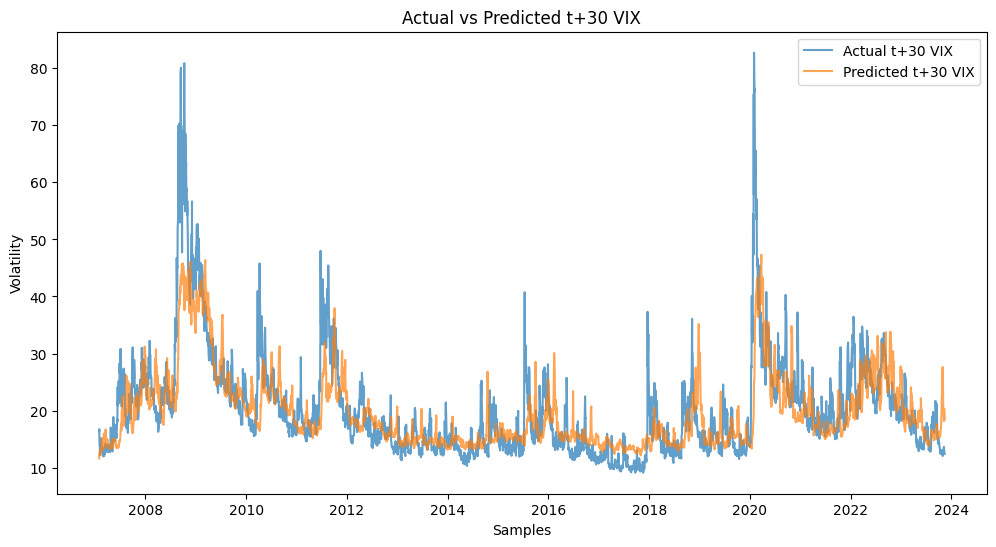

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data_final['VIX_Settlement'], label='Actual t+30 VIX', alpha=0.7)
plt.plot(merged_data_final['LSTM_Predicted'], label='Predicted t+30 VIX', alpha=0.7)
plt.title('Actual vs Predicted t+30 VIX')
plt.xlabel('Samples')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [111]:
merged_data_final.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,30_day_forward_avg_return,30_day_forward_volatility,Adj Close_VIX,...,Predicted Volatility,Volatility_Diff,skew,p10,p90,prDec,prInc,Next_30_days_cum_return,VIX_Settlement,LSTM_Predicted
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,1428.650024,1441.609985,1424.780029,1438.239990,1438.239990,2976690000,0.659288,-0.104071,2.176811,10.42,...,0.215239,-108.530072,-1.046439,-0.083769,0.102377,0.016758,0.000767,-3.195570,16.430000,11.646314
2007-02-01,1437.900024,1446.640015,1437.900024,1445.939941,1445.939941,2914890000,0.535373,-0.134678,2.539403,10.31,...,0.420751,-106.119068,-1.043415,-0.084324,0.103007,0.017047,0.000842,-4.079698,16.790001,11.995759
2007-02-02,1445.939941,1449.329956,1444.489990,1448.390015,1448.390015,2569450000,0.169445,-0.104011,2.704556,10.08,...,0.781182,-100.996155,-1.040392,-0.084880,0.103638,0.017336,0.000918,-3.198721,14.590000,12.602738
2007-02-05,1448.329956,1449.380005,1443.849976,1446.989990,1446.989990,2439430000,-0.096661,-0.079677,2.682342,10.55,...,0.943931,-110.411495,-1.031320,-0.086545,0.105529,0.018204,0.001144,-2.491382,13.270000,12.965777
2007-02-06,1446.979980,1450.189941,1443.400024,1448.000000,1448.000000,2608710000,0.069801,-0.025068,2.732542,10.65,...,0.919690,-112.576670,-1.028296,-0.087100,0.106160,0.018493,0.001220,-0.895025,12.190000,12.957932


In [112]:
merged_data2 = merged_data_final

In [113]:
vix_futures.head()

,Dates,UX1 Index,UX2 Index,UX3 Index,UX4 Index
0,31/12/20,23.675,25.575,25.775,25.950
1,01/01/21,23.675,25.575,25.775,25.950
2,04/01/21,26.275,27.125,26.875,26.825
3,05/01/21,25.325,26.425,26.425,26.425
4,06/01/21,25.125,26.275,26.275,26.225


In [114]:
merged_data_final.reset_index(inplace=True)

vix_futures['Dates'] = pd.to_datetime(vix_futures['Dates'], dayfirst=True)

combined_data = pd.merge(merged_data_final, vix_futures, left_on='Date', right_on='Dates', how='inner')

volatility_threshold = combined_data['LSTM_Predicted'].mean()

In [115]:
merged_data_final = merged_data_final[merged_data_final['Date'] >= pd.Timestamp('2008-01-01')]

In [116]:
def calculate_sharpe_ratio_corrected(returns, annual_risk_free_rate):
    daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/252) - 1

    daily_excess_returns = returns - daily_risk_free_rate

    sharpe_ratio = daily_excess_returns.mean() / daily_excess_returns.std() * np.sqrt(252)
    return sharpe_ratio

merged_data_final['Trade_Signal_SPX'] = 0

merged_data_final['30d_MA_VIX'] = merged_data_final['Adj Close_VIX'].rolling(window=30).mean()

def determine_trade_signal(row):
    if row['LSTM_Predicted'] < 1.2 * row['30d_MA_VIX']:
        return 'Long'
    elif row['LSTM_Predicted'] > 1.2 * row['30d_MA_VIX']:
        return 'Short'
    else:
        return 'Hold'

merged_data_final['Trade_Signal_SPX'] = merged_data_final.apply(determine_trade_signal, axis=1)

merged_data_final['SP500_Returns'] = merged_data_final['Adj Close'].pct_change().fillna(0)

def calculate_strategy_returns(row):
    if row['Trade_Signal_SPX'] == 'Long':
        return row['SP500_Returns']
    elif row['Trade_Signal_SPX'] == 'Short':
        return -row['SP500_Returns']
    else:
        return 0

def calculate_onlylong_strategy_returns(row):
    if row['Trade_Signal_SPX'] == 'Long':
        return row['SP500_Returns']
    elif row['Trade_Signal_SPX'] == 'Short':
        return 0
    else:
        return 0

def calculate_onlyshort_strategy_returns(row):
    if row['Trade_Signal_SPX'] == 'Long':
        return 0
    elif row['Trade_Signal_SPX'] == 'Short':
        return -row['SP500_Returns']
    else:
        return 0

merged_data_final['Strategy_Returns_LS'] = merged_data_final.apply(calculate_strategy_returns, axis=1)
merged_data_final['Strategy_Returns_L'] = merged_data_final.apply(calculate_onlylong_strategy_returns, axis=1)
merged_data_final['Strategy_Returns_S'] = merged_data_final.apply(calculate_onlyshort_strategy_returns, axis=1)

merged_data_final['Cumulative_Returns_LS'] = (1 + merged_data_final['Strategy_Returns_LS']).cumprod()
merged_data_final['Cumulative_Returns_Long'] = (1 + merged_data_final['Strategy_Returns_L']).cumprod()
merged_data_final['Cumulative_Returns_Short'] = (1 + merged_data_final['Strategy_Returns_S']).cumprod()

num_years = (merged_data_final['Date'].iloc[-1] - merged_data_final['Date'].iloc[0]).days / 365.25

risk_free_rate = 0.0426

<ipython-input-116-112074d20ca5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_final['Trade_Signal_SPX'] = 0
<ipython-input-116-112074d20ca5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_final['30d_MA_VIX'] = merged_data_final['Adj Close_VIX'].rolling(window=30).mean()
<ipython-input-116-112074d20ca5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [117]:
merged_data_final['SP500_Cumulative_Returns'] = (1 + merged_data_final['SP500_Returns']).cumprod()

<ipython-input-117-d10dd6c13553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_final['SP500_Cumulative_Returns'] = (1 + merged_data_final['SP500_Returns']).cumprod()


In [118]:
def calculate_max_drawdown(cumulative_returns):
    """
    Calculate the maximum drawdown of the trading strategy.

    :param cumulative_returns: Series of cumulative returns of the strategy.
    :return: Maximum drawdown in percentage.
    """
    running_max = cumulative_returns.cummax()

    drawdown = (cumulative_returns - running_max) / running_max

    max_drawdown = drawdown.min()
    return max_drawdown

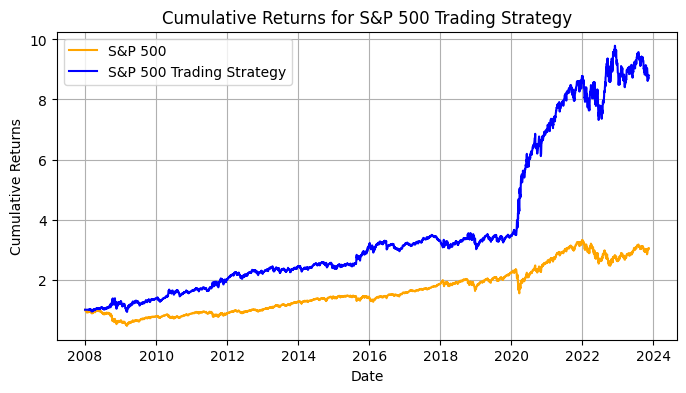

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(merged_data_final['Date'], merged_data_final['SP500_Cumulative_Returns'], label='S&P 500', color='orange')
plt.plot(merged_data_final['Date'], merged_data_final['Cumulative_Returns_LS'], label='S&P 500 Trading Strategy', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns for S&P 500 Trading Strategy')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
def apply_trailing_stop_loss_strategy(cumulative_returns, trade_signals, trailing_stop_loss_percent):
    """
    Apply a trailing stop-loss strategy to both long and short positions in the trading strategy.

    :param cumulative_returns: Series of cumulative returns of the strategy.
    :param trade_signals: Series of trade signals ('Long', 'Short', or other).
    :param trailing_stop_loss_percent: Trailing stop-loss percentage (in decimal format).
    :return: Series with updated cumulative returns applying the trailing stop-loss strategy.
    """
    peak_value = 1.0
    trough_value = 1.0
    stop_loss_value = 1.0
    updated_cumulative_returns = cumulative_returns.copy()

    for i in range(len(cumulative_returns)):
        current_signal = trade_signals.iloc[i]
        current_return = cumulative_returns.iloc[i]

        if current_signal == 'Long':
            if peak_value is None or current_return > peak_value:
                peak_value = current_return
                stop_loss_value = peak_value * (1 - trailing_stop_loss_percent)
            elif current_return < stop_loss_value:
                updated_cumulative_returns.iloc[i] = stop_loss_value

                peak_value = 1.0

        elif current_signal == 'Short':
            if trough_value is None or current_return < trough_value:
                trough_value = current_return
                stop_loss_value = trough_value * (1 + trailing_stop_loss_percent)
            elif current_return > stop_loss_value:
                updated_cumulative_returns.iloc[i] = stop_loss_value

                trough_value = 1.0

            if current_return > stop_loss_value:

                updated_cumulative_returns.iloc[i] = stop_loss_value

                if i < len(cumulative_returns) - 1:
                    trough_value = updated_cumulative_returns.iloc[i+1]
                    stop_loss_value = trough_value * (1 + trailing_stop_loss_percent)

        else:

            updated_cumulative_returns.iloc[i] = current_return

    return updated_cumulative_returns

trailing_stop_loss_percent = 0.05

merged_data_final['Cumulative_Returns_TSL'] = apply_trailing_stop_loss_strategy(merged_data_final['Cumulative_Returns_LS'], merged_data_final['Trade_Signal_SPX'], trailing_stop_loss_percent)
merged_data_final['Cumulative_Returns_TSL_OnlyL'] = apply_trailing_stop_loss_strategy(merged_data_final['Cumulative_Returns_Long'], merged_data_final['Trade_Signal_SPX'], trailing_stop_loss_percent)
merged_data_final['Cumulative_Returns_TSL_OnlyS'] = apply_trailing_stop_loss_strategy(merged_data_final['Cumulative_Returns_Short'], merged_data_final['Trade_Signal_SPX'], trailing_stop_loss_percent)

<ipython-input-121-a26e0fdebd01>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_final['Cumulative_Returns_TSL'] = apply_trailing_stop_loss_strategy(merged_data_final['Cumulative_Returns_LS'], merged_data_final['Trade_Signal_SPX'], trailing_stop_loss_percent)
<ipython-input-121-a26e0fdebd01>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_final['Cumulative_Returns_TSL_OnlyL'] = apply_trailing_stop_loss_strategy(merged_data_final['Cumulative_Returns_Long'], merged_data_final['Trad

In [122]:
cagr = (merged_data_final['Cumulative_Returns_TSL'].iloc[-1] ** (1 / num_years)) - 1
merged_data_final['Strategy_Returns_Combined'] = merged_data_final['Cumulative_Returns_TSL'].pct_change().fillna(0)

annualized_return = merged_data_final['Strategy_Returns_Combined'].mean() * 252
annualized_std_dev = merged_data_final['Strategy_Returns_Combined'].std() * np.sqrt(252)

risk_free_rate = 0.0426

sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev
annualized_return, annualized_std_dev, cagr, sharpe_ratio

<ipython-input-122-01ca94abbaab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_final['Strategy_Returns_Combined'] = merged_data_final['Cumulative_Returns_TSL'].pct_change().fillna(0)


(0.1640629859032595,
 0.23215941627757833,
 0.14697170194116538,
 0.5231878501883976)

In [123]:
cagr = (merged_data_final['Cumulative_Returns_TSL_OnlyL'].iloc[-1] ** (1 / num_years)) - 1
merged_data_final['Strategy_Returns_Combined_OnlyL'] = merged_data_final['Cumulative_Returns_TSL_OnlyL'].pct_change().fillna(0)

annualized_return = merged_data_final['Strategy_Returns_Combined_OnlyL'].mean() * 252
annualized_std_dev = merged_data_final['Strategy_Returns_Combined_OnlyL'].std() * np.sqrt(252)

risk_free_rate = 0.0426

sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev
annualized_return, annualized_std_dev, cagr, sharpe_ratio

<ipython-input-123-aff905d1d33e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_final['Strategy_Returns_Combined_OnlyL'] = merged_data_final['Cumulative_Returns_TSL_OnlyL'].pct_change().fillna(0)


(0.1339948557224755,
 0.21687858455509354,
 0.116745182834606,
 0.4214102370225425)

In [124]:
cagr = (merged_data_final['Cumulative_Returns_TSL_OnlyS'].iloc[-1] ** (1 / num_years)) - 1
merged_data_final['Strategy_Returns_Combined_OnlyS'] = merged_data_final['Cumulative_Returns_TSL_OnlyS'].pct_change().fillna(0)

annualized_return = merged_data_final['Strategy_Returns_Combined_OnlyS'].mean() * 252
annualized_std_dev = merged_data_final['Strategy_Returns_Combined_OnlyS'].std() * np.sqrt(252)

risk_free_rate = 0.0426

sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev
annualized_return, annualized_std_dev, cagr, sharpe_ratio

<ipython-input-124-9ce084511357>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_final['Strategy_Returns_Combined_OnlyS'] = merged_data_final['Cumulative_Returns_TSL_OnlyS'].pct_change().fillna(0)


(0.04077890326447031,
 0.1683731709786835,
 0.027066621438057714,
 -0.010815836780553612)

In [125]:
cagr = (merged_data_final['SP500_Cumulative_Returns'].iloc[-1] ** (1 / num_years)) - 1
merged_data_final['Strategy_Returns_SPX'] = merged_data_final['SP500_Cumulative_Returns'].pct_change().fillna(0)

annualized_return = merged_data_final['SP500_Returns'].mean() * 252
annualized_std_dev = merged_data_final['SP500_Returns'].std() * np.sqrt(252)

risk_free_rate = 0.0426

sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev
annualized_return, annualized_std_dev, cagr, sharpe_ratio

<ipython-input-125-2200998ddafe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_final['Strategy_Returns_SPX'] = merged_data_final['SP500_Cumulative_Returns'].pct_change().fillna(0)


(0.09152936653612352,
 0.2056843274365392,
 0.07279255349368863,
 0.2378857307502923)

In [126]:
max_drawdown = calculate_max_drawdown(merged_data_final['Cumulative_Returns_TSL'])
max_drawdown_percentage = max_drawdown * 100

max_drawdown_percentage

-26.9716118071091

In [127]:
max_drawdown = calculate_max_drawdown(merged_data_final['SP500_Cumulative_Returns'])
max_drawdown_percentage = max_drawdown * 100

max_drawdown_percentage

-53.25119453927664

In [128]:
max_drawdown = calculate_max_drawdown(merged_data_final['Cumulative_Returns_TSL_OnlyL'])
max_drawdown_percentage = max_drawdown * 100

max_drawdown_percentage

-20.14632089844736

In [129]:
max_drawdown = calculate_max_drawdown(merged_data_final['Cumulative_Returns_TSL_OnlyS'])
max_drawdown_percentage = max_drawdown * 100

max_drawdown_percentage

-24.24470107173689

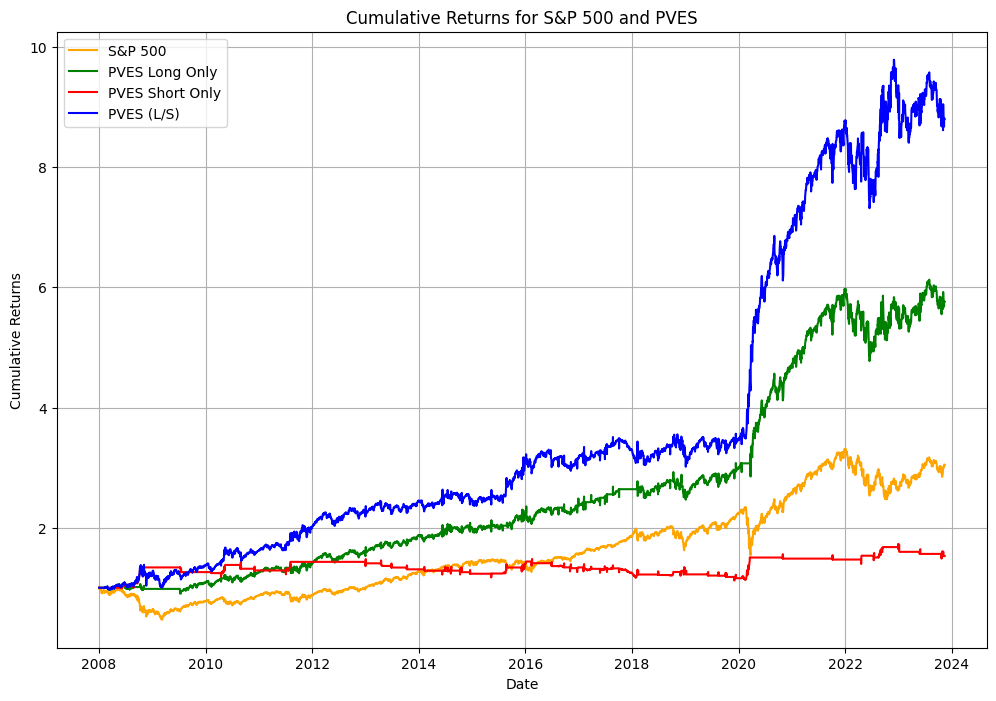

In [130]:
plt.figure(figsize=(12, 8))
plt.plot(merged_data_final['Date'], merged_data_final['SP500_Cumulative_Returns'], label='S&P 500', color='orange')
plt.plot(merged_data_final['Date'], merged_data_final['Cumulative_Returns_TSL_OnlyL'], label='PVES Long Only', color='green')
plt.plot(merged_data_final['Date'], merged_data_final['Cumulative_Returns_TSL_OnlyS'], label='PVES Short Only', color='red')
plt.plot(merged_data_final['Date'], merged_data_final['Cumulative_Returns_TSL'], label='PVES (L/S)', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns for S&P 500 and PVES')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from statsmodels.stats.diagnostic import het_white

def newey_west_analysis(strategy_returns, benchmark_returns):

    strategy_df = pd.DataFrame(strategy_returns, columns=['Strategy_Returns_Combined'])
    benchmark_df = pd.DataFrame(benchmark_returns, columns=['Strategy_Returns_SPX'])
    combined_df = strategy_df.join(benchmark_df, how='inner')

    X = combined_df['Strategy_Returns_SPX']
    X = sm.add_constant(X)

    Y = combined_df['Strategy_Returns_Combined']

    model = sm.OLS(Y, X).fit(cov_type='HAC',cov_kwds={'maxlags':1})

    return model.summary()

strategy_returns = merged_data_final
benchmark_returns = merged_data_final
result = newey_west_analysis(strategy_returns, benchmark_returns)
print(result)

                                OLS Regression Results                               
Dep. Variable:     Strategy_Returns_Combined   R-squared:                       0.228
Model:                                   OLS   Adj. R-squared:                  0.228
Method:                        Least Squares   F-statistic:                     110.5
Date:                       Thu, 29 Feb 2024   Prob (F-statistic):           1.64e-25
Time:                               19:00:02   Log-Likelihood:                 11728.
No. Observations:                       3995   AIC:                        -2.345e+04
Df Residuals:                           3993   BIC:                        -2.344e+04
Df Model:                                  1                                         
Covariance Type:                         HAC                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

In [132]:
def newey_west_analysis(strategy_returns, benchmark_returns):
    strategy_df = pd.DataFrame(strategy_returns, columns=['Strategy_Returns_Combined_OnlyL'])
    benchmark_df = pd.DataFrame(benchmark_returns, columns=['Strategy_Returns_SPX'])
    combined_df = strategy_df.join(benchmark_df, how='inner')

    X = combined_df['Strategy_Returns_SPX']
    X = sm.add_constant(X)

    Y = combined_df['Strategy_Returns_Combined_OnlyL']

    model = sm.OLS(Y, X).fit(cov_type='HAC',cov_kwds={'maxlags':1})

    return model.summary()

strategy_returns = merged_data_final
benchmark_returns = merged_data_final
result = newey_west_analysis(strategy_returns, benchmark_returns)
print(result)

                                   OLS Regression Results                                  
Dep. Variable:     Strategy_Returns_Combined_OnlyL   R-squared:                       0.225
Model:                                         OLS   Adj. R-squared:                  0.225
Method:                              Least Squares   F-statistic:                     159.2
Date:                             Thu, 29 Feb 2024   Prob (F-statistic):           8.27e-36
Time:                                     19:00:02   Log-Likelihood:                 11993.
No. Observations:                             3995   AIC:                        -2.398e+04
Df Residuals:                                 3993   BIC:                        -2.397e+04
Df Model:                                        1                                         
Covariance Type:                               HAC                                         
                           coef    std err          z      P>|z|      [0.025    

In [133]:
def newey_west_analysis(strategy_returns, benchmark_returns):

    strategy_df = pd.DataFrame(strategy_returns, columns=['Strategy_Returns_Combined_OnlyS'])
    benchmark_df = pd.DataFrame(benchmark_returns, columns=['Strategy_Returns_SPX'])
    combined_df = strategy_df.join(benchmark_df, how='inner')

    X = combined_df['Strategy_Returns_SPX']
    X = sm.add_constant(X)

    Y = combined_df['Strategy_Returns_Combined_OnlyS']

    model = sm.OLS(Y, X).fit(cov_type='HAC',cov_kwds={'maxlags':1})

    return model.summary()

strategy_returns = merged_data_final
benchmark_returns = merged_data_final
result = newey_west_analysis(strategy_returns, benchmark_returns)
print(result)

                                   OLS Regression Results                                  
Dep. Variable:     Strategy_Returns_Combined_OnlyS   R-squared:                       0.034
Model:                                         OLS   Adj. R-squared:                  0.033
Method:                              Least Squares   F-statistic:                     43.63
Date:                             Thu, 29 Feb 2024   Prob (F-statistic):           4.48e-11
Time:                                     19:00:02   Log-Likelihood:                 12563.
No. Observations:                             3995   AIC:                        -2.512e+04
Df Residuals:                                 3993   BIC:                        -2.511e+04
Df Model:                                        1                                         
Covariance Type:                               HAC                                         
                           coef    std err          z      P>|z|      [0.025    